# Introduction to Scikit-Learn (sklearn)
This notebook will demonstrates some of the most useful functions of the beautiful Scikit-Learn Library

what we're covering:

0. An end to end Scikit-Learn Workflow
1. Getting the Data Ready
2. Choose the Right Estimator/Algorithms for our problems
3. Fit the Model/Estimator/Algorithms and use it to make predictions on our data
4. Eavaluating a Model
5. Improve a Model
6. Sava and load a trained Model
7. Putting it all together

## 0. An end to end Scikit-Learn Workflow

In [1]:
# 1. Get the Data Ready
# Standard import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease[:10]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [2]:
# create X (Features Matrix):

x = heart_disease.drop("target", axis = 1)

# Create Y (Labels):-

y = heart_disease["target"]

In [3]:
# 2. Choose the right model & hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We will keep the default hyperparameters

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3. Fit the model to the trainaing data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [5]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [6]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
clf.score(x_test, y_test)

0.8032786885245902

In [9]:
# make a prediction

import numpy as np

y_label = clf.predict(np.array([0, 2, 3, 4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
y_preds = clf.predict(x_test)
y_preds

In [ ]:
y_test

In [10]:
# 4. Evaluate a Model on the training data and test data

clf.score(x_train, y_train)

1.0

In [11]:
clf.score(x_test, y_test)

0.8032786885245902

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))


NameError: name 'y_preds' is not defined

In [13]:
confusion_matrix(y_test, y_preds)

NameError: name 'y_preds' is not defined

In [14]:
accuracy_score(y_test, y_preds)

NameError: name 'y_preds' is not defined

In [15]:
# 5. Improve a model

# try different amount of n-estimatores

np.random.seed(42)

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(x_train, y_train)
    print(f"model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
model accuracy on test set: 81.97%

Trying model with 20 estimators...
model accuracy on test set: 85.25%

Trying model with 30 estimators...
model accuracy on test set: 80.33%

Trying model with 40 estimators...
model accuracy on test set: 85.25%

Trying model with 50 estimators...
model accuracy on test set: 81.97%

Trying model with 60 estimators...
model accuracy on test set: 78.69%

Trying model with 70 estimators...
model accuracy on test set: 80.33%

Trying model with 80 estimators...
model accuracy on test set: 83.61%

Trying model with 90 estimators...
model accuracy on test set: 80.33%



In [16]:
# 6. Save a model and load it

import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [17]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.8032786885245902

In [18]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Arun Tiwari\Favorites\Sample_project_1\env\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
      sklearn: 1.3.0
          pip: 23.3.1
   setuptools: 68.2.2
        numpy: 1.24.3
        scipy: 1.11.4
       Cython: None
       pandas: 2.1.4
   matplotlib: 3.8.0
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\Arun Tiwari\Favorites\Sample_project_1\env\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 2
threading_layer: intel

       filepath: C:\Users\Arun Tiwari\Favorites\Sample_project_1\env\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 4


## 1. Getting the Data Ready to be used with Machine Learning:-

Three Main things we have to do:- 

    1. Split the data into features and labels (usually x & y)
    
    2. Filling (also called imputing) or disregarding missing values
    
    3. Converting Non Numetical values to numerical values caleed Feature Encoding

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
x = heart_disease.drop("target", axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:

# Split the data into training and test data sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [24]:
x.shape

(303, 13)

In [25]:
len(heart_disease)

303

## 1.1 Make Sure it's all Numerical


In [26]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
5,Honda,Red,42652,4,23883
6,Toyota,Blue,163453,4,8473
7,Honda,White,43120,4,20306
8,Nissan,White,130538,4,9374
9,Honda,Blue,51029,4,26683


In [27]:
len(car_sales)

1000

In [28]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [29]:
# Split the data into x (features) and Y (labels):- 

x = car_sales.drop("Price", axis = 1)

y = car_sales["Price"]


# Split the data into training and test set :- 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)



In [30]:
# Build Machine Learning Model:-

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [31]:
# Turn the categories into Numbers:- 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Categorical_Features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  Categorical_Features)],
                                  remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [33]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [34]:
# Refit the model
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)

model.fit(x_train, y_train)

RandomForestRegressor()

In [35]:
model.score(x_test, y_test)

0.3235867221569877

# 1.2 What if there were missing Values

1. Fill them with some value (also known as imputation)
2. Remove the samples with mising data altogether

In [36]:
# Import car sales missing data

car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [37]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
# Create x and y

x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [39]:
# Turn the categories into Numbers:- 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Categorical_Features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  Categorical_Features)],
                                  remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [40]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [41]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

## Option 1:- Fill Missing Values with Pandas

In [42]:
# Fill the Make Column:- 

car_sales_missing["Make"].fillna("missing", inplace = True)

# Fill the Colour Column:- 

car_sales_missing["Colour"].fillna("missing", inplace = True)

# Fill the Doors Columns:- 
car_sales_missing["Doors"].fillna(4, inplace = True)

# Fill the Odometer
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)



In [43]:
# Check the dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [44]:
# Remove Rows with Missing Price Values:- 

car_sales_missing.dropna(inplace = True)

In [45]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [46]:
len(car_sales_missing)

950

In [47]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [48]:
x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [49]:
# Turn the categories into Numbers:- 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Categorical_Features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  Categorical_Features)],
                                  remainder = "passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2:- Missing Values with Scikit-Learn

In [50]:

car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [51]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [52]:
# Drop the rows with no labels

car_sales_missing.dropna(subset = ["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [53]:
# Split the data into x and y:- 

x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [54]:



# Fill the missing value with Scikit Learn:- 

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing and numerical values with means:-

cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

# Define Columns:- 
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data):- 

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data:- 

filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [55]:
car_sales_filled = pd.DataFrame(filled_x,
                                columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [56]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [57]:
# Turn the categories into Numbers:- 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Categorical_Features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  Categorical_Features)],
                                  remainder = "passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [58]:
# Now we have got our data as numbers and no missing values, lets fit a model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)


model = RandomForestRegressor()

model.fit(x_train, y_train)

RandomForestRegressor()

In [59]:
model.score(x_test, y_test)

0.21990196728583944

In [60]:
len(car_sales), len(car_sales_filled)

(1000, 950)

# 2. Choosing the right estimator/algoritm for your problems:- 

Something to note:- 

    * sklearn refers to machine learning models, algorithms as estimators.
    
    * Classification Problems :- Predicting a category (eg:- heart disease or not)
        * Sometimes you will see 'clf' (short for classifier) used as a classification estimator
        
    * Regression Problems:- Predicting a number (eg:- Selling Price of a car)
    
if you are working on a machine learning problem and looking to use sklearn and not sure whar model you should use, refer to use sklearn machine learning map:- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

### 2.1 Picking a machine learning model for a Regression Problems:- 

let's use California Housing dataset:- 

In [61]:

# Get California housing datasets:- 
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [62]:

housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [63]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [64]:
# import algorithm/estimators:- 
from sklearn.linear_model import Ridge

# Set Up Random Seed:- 

np.random.seed(42)

# Split the data into x and y:- 

x = housing_df.drop("target", axis = 1)
y = housing_df["target"]    # Median house price in $ 100,000s

# Split the data into train and test set:- 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate and fit the model (on the training set):- 
model = Ridge()
model.fit(x_train, y_train)

# Check the score of the model (on the test set):- 
model.score(x_test, y_test)

0.5758549611440129

# what if Ridge didn't work or the score doesn't fit our needs?
 Well we could always try a different model:-

 how about we try an ensemble model (An ensemble model is a combination of smaller models to try and make better predictiction than just a single model.

 sklearn ensemble model can be found here:- 

In [ ]:
# Import the Random Forest Regressor model class from ensemble module

from sklearn.ensemble import RandomForestRegressor

# Set up Random Seed:- 
np.random.seed(42)

# Create the data:- 

x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# Split the data into training and test set:- 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# create Random Forest Model:- 
model = RandomForestRegressor()
model.fit(x_train, y_train)

# check the score on test data:-

model.score(x_test, y_test)

# 2.2 Picking a machine learning model for a classification problem:-

In [65]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
len(heart_disease)

303

# Consulting the Map and it says to try Linear SVC:- 

In [67]:
# Import the linearSVC estimator class

from sklearn.svm import LinearSVC

# Set Up Random Seed:- 
np.random.seed(42)

# Create the data:- 

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data into training and test set:- 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate LinearSVC Model:- 

clf = LinearSVC()
clf.fit(x_train, y_train)

# Evaluate LinerSVC:- 
clf.score(x_test, y_test)

0.8688524590163934

In [68]:
# Import the RandomForestClassifier estimator class

from sklearn.ensemble import RandomForestClassifier

# Set Up Random Seed:- 
np.random.seed(42)

# Create the data:- 

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data into training and test set:- 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate RandomForestClassifier Model:- 

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Evaluate RandomForestClassifier:- 
clf.score(x_test, y_test)

0.8524590163934426

In [69]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Tidbit:- 
  If you have structured data, use ensemble methods
  
  if you have unstructed data, use deep learning or transfer learning


### 3. Fit the Model/Algorithm on our data and use it to make predictions

## 3.1 Fitting the model to our data

Different names for:- 

* x = features, features variables, data
* y = labels, targets, target variables

In [70]:
# Import the RandomForestClassifier estimator class

from sklearn.ensemble import RandomForestClassifier

# Set Up Random Seed:- 
np.random.seed(42)

# Create the data:- 

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data into training and test set:- 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate RandomForestClassifier Model:- 

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Evaluate RandomForestClassifier:- 
clf.score(x_test, y_test)

0.8524590163934426

In [71]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [72]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make Predictions using a machine learning model


# Two ways to make predictions:- 
1. predict()
2. predict_proba()

In [73]:
# Use a trained model to make predictions

clf.predict(np.array([2, 3, 5, 6, 8]))  # This doesn't work


ValueError: Expected 2D array, got 1D array instead:
array=[2. 3. 5. 6. 8.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [74]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [75]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [76]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [77]:
# Compare prediction to truth lables to evaluate the model

y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [78]:
clf.score(x_test, y_test)

0.8524590163934426

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_preds, y_test)

0.8524590163934426

# Make Predictions with predict_probe():-

In [80]:
# Predict_proba() returns probabilities of a classification label

clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [81]:
# Let's predict on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [82]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [83]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

# predict() can also be used for Regression Model

In [84]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [85]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data:- 

x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# Split the data into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data:- 
model.fit(x_train, y_train)

# make prediction
y_preds = model.predict(x_test)
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [86]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [87]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [88]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

# 4.0 Evaluating a machine learning model

Three Ways to evaluate scikit-learn models/estimators:-

1. Estimators built in 'score()' methods
    
2. The 'Scoring' Parameter
    
3. Problem specific metric functions

## 4.1 Evaluating a model with score method:- 

In [89]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create x & y:- 
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# create train test:- 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# create classifier model instance:- 
clf = RandomForestClassifier()

# Fit classifier to training data:- 

clf.fit(x_train, y_train)

RandomForestClassifier()

In [90]:
# The highest value of .score() method is 1.0 and the lowest is 0.0

clf.score(x_train, y_train)

1.0

In [91]:
clf.score(x_test, y_test)

0.8524590163934426

# Lets use the score() on Regressor Model

In [92]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create x & y:- 
x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# create train test:- 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# create classifier model instance:- 
model = RandomForestRegressor()

# Fit classifier to training data:- 

model.fit(x_train, y_train)

RandomForestRegressor()

In [93]:
model.score(x_test, y_test)

0.8065734772187598

# 4.2 Evaluating a model using scoring parameter

In [94]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create x & y:- 
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# create train test:- 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# create classifier model instance:- 
clf = RandomForestClassifier(n_estimators = 100)

# Fit classifier to training data:- 

clf.fit(x_train, y_train)


RandomForestClassifier()

In [95]:
clf.score(x_test, y_test)

0.8524590163934426

In [96]:
cross_val_score(clf, x, y, cv = 10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [97]:
np.random.seed(42)

# Single training and test split score:- 
clf_single_score = clf.score(x_test, y_test)

# Take the mean of 5 cross validation score:- 
clf_cross_val_score = np.mean(cross_val_score(clf, x , y, cv = 5))

# Compare the two:- 

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [98]:
# Default scorig parameter of classifier = Mean accuracy
clf.score(x_test, y_test)

0.8524590163934426

In [99]:
# Default scoring parameter set to none by default:- 

cross_val_score(clf, x, y, cv = 5, scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification Model Evalutaion Matrix:- 
1. Accuracy
2. Area Under ROC Curve
3. Confusion Matrix
4. Classification Report

In [100]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators = 100)

cross_val_score = cross_val_score(clf, x, y, cv = 5)

In [102]:
np.mean(cross_val_score)

0.8248087431693989

In [103]:
print(f"Heart Disease Classifier Cross-Validity-Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validity-Accuracy: 82.48%


**Area Under the receiver operating characteristic curve (AUC/ROC)**
* Area Under Curve (AUC)
* ROC Curve
  
Roc Curve is a comparison of model's true positive rate (TPR) versus model's false positive rate(FPR).

* True Positive:- Model predict 1 when truth is 1
* False Positive:- Model predict 1 when truth is 0
* True Negative:- Model predict 0 when truth is 0
* False Negative:- Model predict 0 when truth is 1

In [104]:
# create x_test etc....

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Fit the model:- 
clf.fit(x_train, y_train)

# Make prediction with probabilities:- 

y_probs = clf.predict_proba(x_test)
y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [105]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [106]:
# Calculate fpr, tpr and Thresholds:- 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

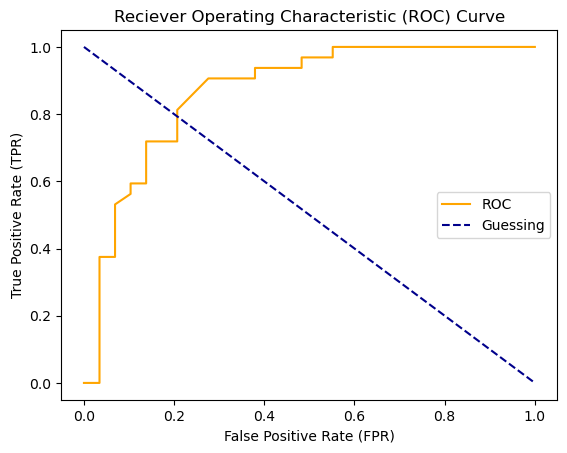

In [107]:
# Create a function for plotting roc curve :- 
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    plots the ROC curve given a false positive rate (fpr) and True positive rate (tpr) of a model.
    """

# plot roc curve:- 
plt.plot(fpr, tpr, color = "orange", label = "ROC")

# Plot line with no predictive power (baseline):-
plt.plot([0,1], [1,0] , color = "darkblue", linestyle = "--", label = "Guessing")

# Customize the plot:- 
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Reciever Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

plot_roc_curve(fpr, tpr)

In [108]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

In [109]:
# Plot perferct ROC Curve and AUC Score:- 

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)


In [110]:
# Perfect AUC Score

roc_auc_score(y_test, y_test)

1.0

# Confusion Matrix:-

A Confusion Matrix is quick way to compare the labels a model predicts and the actual label it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.`

In [111]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [112]:
# Visualize confusion matrix with pd.crosstab():-
pd.crosstab(y_test,
            y_preds,
            rownames = ["Actual Labels"],
            colnames = ["Predicted Labels"])



Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


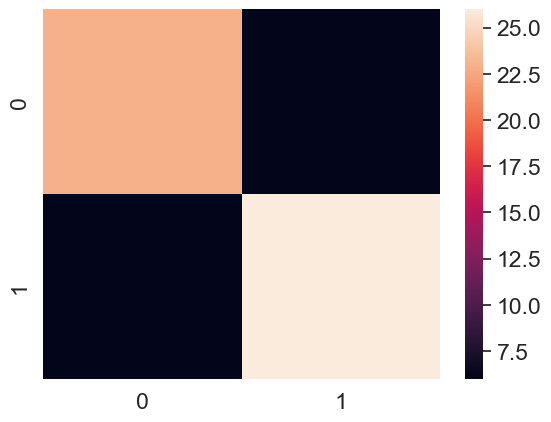

In [113]:
# Make our confusion matrix more visual by using seaborn's heatmap():- 
import seaborn as sns

#set the font scale:- 
sns.set(font_scale = 1.5)

# create confunsion matrix:- 
conf_mat = confusion_matrix(y_test, y_preds)

#Plot it using seaborns:- 

sns.heatmap(conf_mat);


## Creating a confusion matrix with scikit-learn
To use the new methods of creating a confusion matrix with scikit-learn you will need sklearn version 1.0+

In [114]:
import sklearn
print(sklearn.__version__)

1.3.0


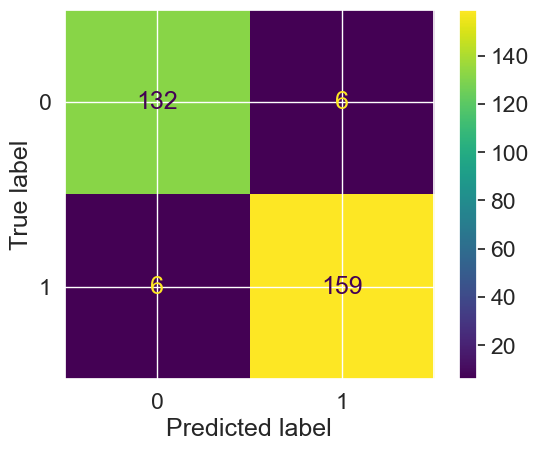

In [115]:

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, x, y)

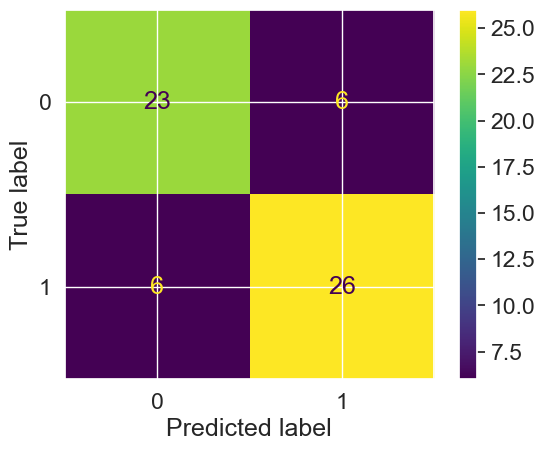

In [116]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                        y_pred = y_preds);

# Classification Report

In [117]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [118]:
# Whether precision and recall becomes valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one positive case

disease_preds = np.zeros(10000)  # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds, 
                                   output_dict = True))



,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## 4.2 Regression Model Evaluation Matrix

The ones we are going to cover here:- 
1. R^2 (Pronounced R Squared or Coefficient of determination)
2. MAE (Mean Absolute Error)
3. MSE (Mean Squared Error)

In [119]:
from sklearn.ensemble import RandomForestRegressor

x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = RandomForestRegressor(n_estimators = 100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [120]:
model.score(x_test, y_test)

0.8019721490608143

In [121]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [122]:
y_test

17314    2.30800
12078    1.11000
8331     1.24300
7542     1.04600
5019     0.98700
          ...   
205      1.22500
6687     2.60400
11148    1.70700
17062    2.47200
14370    5.00001
Name: target, Length: 4128, dtype: float64

In [123]:

y_test.mean()

2.0561935125968986

In [124]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean

y_test_mean = np.full(len(y_test), y_test.mean())

In [125]:
y_test_mean[:10]

array([2.05619351, 2.05619351, 2.05619351, 2.05619351, 2.05619351,
       2.05619351, 2.05619351, 2.05619351, 2.05619351, 2.05619351])

In [126]:
r2_score(y_true = y_test,
         y_pred = y_test_mean)

0.0

In [127]:
r2_score(y_true = y_test,
         y_pred = y_test)

1.0

## Mean Absolute Error (MAE):- 

MAE is the average of absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [128]:
# MAE 
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32753007422480646

In [129]:
y_preds

array([2.19931  , 1.21494  , 1.10828  , ..., 2.07423  , 1.98545  ,
       3.0499803])

In [130]:
y_test

17314    2.30800
12078    1.11000
8331     1.24300
7542     1.04600
5019     0.98700
          ...   
205      1.22500
6687     2.60400
11148    1.70700
17062    2.47200
14370    5.00001
Name: target, Length: 4128, dtype: float64

In [131]:
df = pd.DataFrame({"Actual Value" : y_test,
                   "Predicted Value" : y_preds})

df["Differences"] = df["Actual Value"] - df["Predicted Value"]
df.head(10)

,Actual Value,Predicted Value,Differences
17314,2.308,2.19931,0.10869
12078,1.110,1.21494,-0.10494
8331,1.243,1.10828,0.13472
7542,1.046,1.24288,-0.19688
5019,0.987,1.44943,-0.46243
20133,1.761,1.93534,-0.17434
3836,2.436,2.43408,0.00192
12495,1.575,1.54680,0.02820
3115,0.917,0.85054,0.06646
12806,1.356,1.29018,0.06582


In [132]:
## MAE Using formulas and differences

np.abs(df["Differences"]).mean()

0.32753007422480646

# Mean Squared Error (MSE):- 

MSE is the mean of the square of the errors between actual and predicted values.

In [133]:
# Mean Squared error:- 
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)

mse = mean_squared_error(y_test, y_preds)
mse

0.25940673726013685

In [134]:
df["Squared Differences"] = np.square(df["Differences"])
df.head(10)

,Actual Value,Predicted Value,Differences,Squared Differences
17314,2.308,2.19931,0.10869,0.011814
12078,1.110,1.21494,-0.10494,0.011012
8331,1.243,1.10828,0.13472,0.018149
7542,1.046,1.24288,-0.19688,0.038762
5019,0.987,1.44943,-0.46243,0.213842
20133,1.761,1.93534,-0.17434,0.030394
3836,2.436,2.43408,0.00192,0.000004
12495,1.575,1.54680,0.02820,0.000795
3115,0.917,0.85054,0.06646,0.004417
12806,1.356,1.29018,0.06582,0.004332


In [135]:
# Calculate mse by hand

squared = np.square(df["Differences"])
squared.mean()

0.25940673726013685

In [136]:
df_large_error = df.copy()
df_large_error.iloc[0]["Squared Differences"] = 16

In [137]:
df_large_error.head()

,Actual Value,Predicted Value,Differences,Squared Differences
17314,2.308,2.19931,0.10869,16.000000
12078,1.110,1.21494,-0.10494,0.011012
8331,1.243,1.10828,0.13472,0.018149
7542,1.046,1.24288,-0.19688,0.038762
5019,0.987,1.44943,-0.46243,0.213842


In [138]:
# Calculate MSE With large error
df_large_error["Squared Differences"].mean()

0.26327984445100405

In [139]:
df_large_error.iloc[1:100] = 20
df_large_error

,Actual Value,Predicted Value,Differences,Squared Differences
17314,2.30800,2.19931,0.10869,16.000000
12078,20.00000,20.00000,20.00000,20.000000
8331,20.00000,20.00000,20.00000,20.000000
7542,20.00000,20.00000,20.00000,20.000000
5019,20.00000,20.00000,20.00000,20.000000
...,...,...,...,...
205,1.22500,1.46805,-0.24305,0.059073
6687,2.60400,2.34967,0.25433,0.064684
11148,1.70700,2.07423,-0.36723,0.134858
17062,2.47200,1.98545,0.48655,0.236731


In [140]:
# Calculate MSE With large error
df_large_error["Squared Differences"].mean()

0.7368630798052817

### 4.2.3 Finally Using the Scoring Parameter

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators = 100)

In [142]:
np.random.seed(42)

# Cross Validation Accuracy:- 
cv_acc = cross_val_score(clf, x, y, cv = 5, scoring = None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [143]:
# Cross Validated Accuracy
print(f"The Cross Validated Accuracy is : {np.mean(cv_acc)*100 :.2f}%")

The Cross Validated Accuracy is : 82.48%


In [144]:
np.random.seed(42)

cv_acc = cross_val_score(clf, x, y, cv = 5, scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [145]:
# Cross Validated Accuracy
print(f"The Cross Validated Accuracy is : {np.mean(cv_acc)*100 :.2f}%")

The Cross Validated Accuracy is : 82.48%


## Precision

In [146]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, x, y, cv = 5, scoring = "precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [147]:
# Cross Validated Precision
print(f"The Cross Validated Precision is : {np.mean(cv_precision)}")

The Cross Validated Precision is : 0.8329547346025924


# Recall

In [148]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, x, y, cv = 5, scoring = "recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [149]:
# Cross Validated Recall
print(f"The Cross Validated Recall is : {np.mean(cv_precision)}")

The Cross Validated Recall is : 0.8329547346025924


# F1

In [150]:
# F1

np.random.seed(42)
cv_f1 = cross_val_score(clf, x, y, cv = 5, scoring = "f1")
cv_f1

array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

In [151]:
# Cross Validated F1
print(f"The Cross Validated F1 is : {np.mean(cv_f1)}")

The Cross Validated F1 is : 0.8426854603423346


# Let's see scoring parameter should be used for Regression Problem

In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators = 100)

In [153]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x , y, cv = 3, scoring = None)
np.mean(cv_r2)

0.6545458023124507

# Mean Squared Error

In [154]:
# MSE
np.random.seed(42)
cv_mse = cross_val_score(model, x, y, cv = 5, scoring = "neg_mean_squared_error")
np.mean(cv_mse)

-0.4301865790173885

In [155]:
cv_mse

array([-0.51906271, -0.34789469, -0.37117373, -0.4500546 , -0.46274716])

# Mean Absolute Error

In [156]:
# MAE
np.random.seed(42)
cv_mae = cross_val_score(model, x, y, cv = 5, scoring = "neg_mean_absolute_error")
np.mean(cv_mae)

-0.46620501732073655

In [157]:
cv_mae

array([-0.54256026, -0.40902123, -0.43706982, -0.46918522, -0.47318856])

# 4.3 Using Different evaluation metrics as scikit-learn functions

The 3rd way to evaluate scikit learn machine learning models/estimators is to use the sklearn.metrics modules

In [158]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

# create x & y:- 
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split the data:- 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# create the model:- 
clf = RandomForestClassifier()

# fit model:- 
clf.fit(x_train, y_train)

# Predict the data:- 
y_preds = clf.predict(x_test)

# Evaluate the model:- 
print(f"Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")
print(f"Precision: {precision_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Recall: 0.875
F1: 0.8615384615384615
Precision: 0.8484848484848485


In [159]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create x and y

x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# split the data:- 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# create the model:- 
model = RandomForestRegressor()

# fit the model:- 
model.fit(x_train, y_train)

# Predict the data:- 
y_preds = model.predict(x_test)

# Evaluate the model:- 
print(f"Regression Metrics on test set")
print(f"R2 Score :{r2_score(y_test, y_preds)}")
print(f"MAE :{mean_absolute_error(y_test, y_preds)}")
print(f"MSE :{mean_squared_error(y_test, y_preds)}")

Regression Metrics on test set
R2 Score :0.8065734772187598
MAE :0.32659871732073664
MSE :0.2534678520824551


## 5. Improving a Model:- 

first prediction = basline prediction
first model = baseline model

From a data perspective :- 
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:- 
* Is there a better model we could use?
* Could we improve the current model?

Parameters Vs Hyperparameters:- 
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model these can adjust to (potentially) improve its ability to find patterns

3 ways to adjust Hyperparameters:- 
1. By Hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [160]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning Hyperparameters by Hand:- 
Let's make 3 sets:-  Training, Validation and Test 

In [161]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# We are going to try and adjust below:- 
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [165]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparision on y true labels Vs. y pred. labels on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy *100:.2f}%")
    print(f"precision: {precision:.2f}")
    print(f"recall: {recall:.2f}")
    print(f"f1: {f1:.2f}")

    return metric_dict
    

In [167]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffile the data:- 
heart_disease_shuffled = heart_disease.sample(frac = 1)

# Split into x and y:- 
x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# split the data into train, validation and test set:- 

train_split = round(0.7 * len(heart_disease_shuffled))  # 70% of the data
valid_split = round(train_split + 0.15*len(heart_disease_shuffled)) # 15% of the data
x_train, y_train = x [:train_split], y[:train_split]
x_valid, y_valid = x[train_split: valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[:valid_split]

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make baseline predictions:- 
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set:- 
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
precision: 0.81
recall: 0.88
f1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [168]:
np.random.seed(42)

# Create a second Classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators = 100)
clf_2.fit(x_train, y_train)

# Make prediction with different hyperparameters
y_preds_2 = clf_2.predict(x_valid)

# Evaluate the 2nd classifier:- 
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)


Acc: 82.22%
precision: 0.84
recall: 0.84
f1: 0.84


# 5.2 Hyperparameter tuning with RandomizedSearchCV

In [176]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# split into x and y:- 
x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# split into train and test set:- 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate RandomForestClassifier:- 
clf = RandomForestClassifier(n_jobs = 1)

# Setup RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator = clf, 
                            param_distributions = grid,
                            n_iter = 10,
                            cv = 5,
                            verbose = 2)

# Fit the RandomizedSearchCV version for Classifier:- 
rs_clf.fit(x_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [177]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [180]:
# Make prediction with best hyperparameters :-
rs_y_preds = rs_clf.predict(x_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
precision: 0.77
recall: 0.86
f1: 0.81


In [181]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [182]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [183]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# split into x and y:- 
x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# split into train and test set:- 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate RandomForestClassifier:- 
clf = RandomForestClassifier(n_jobs = 1)

# Setup GridSearchCV

gs_clf = GridSearchCV(estimator = clf, 
                      param_grid = grid_2,
                      cv = 5,
                      verbose = 2)

# Fit the GridSearchCV version for Classifier:- 
gs_clf.fit(x_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [184]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [185]:
gs_y_preds = gs_clf.predict(x_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
precision: 0.77
recall: 0.86
f1: 0.81


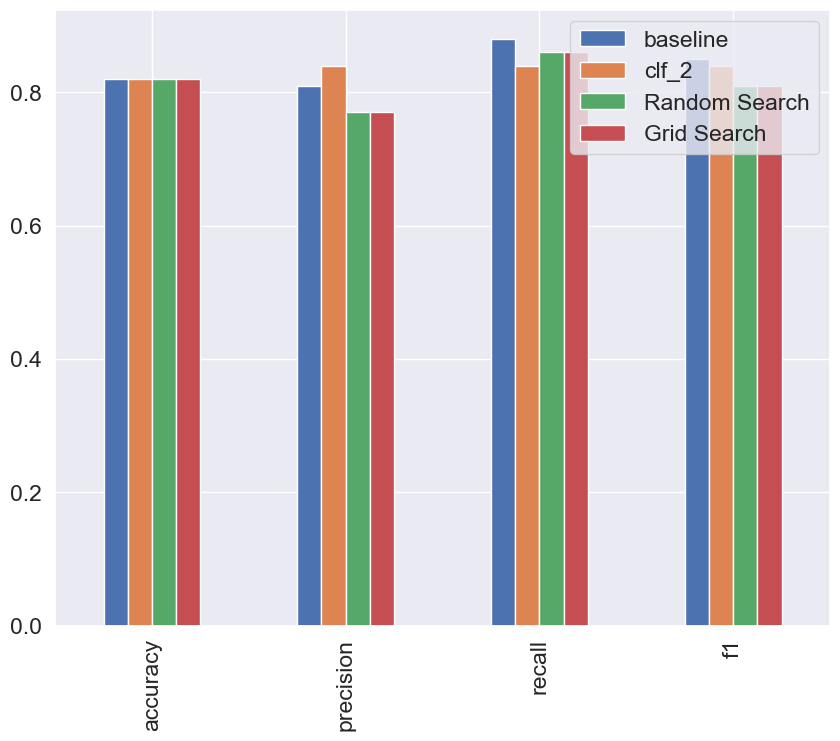

In [186]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "Random Search": rs_metrics,
                                "Grid Search": gs_metrics})
compare_metrics.plot.bar(figsize = (10, 8));

# 6. Saving and Loading a trained machine learning model
Two ways to save and load a model:- 
1. With Pythons `pickle` module
2. with the `joblib` module

# Pickle

In [188]:
import pickle
# Save and exsiting model to file

pickle.dump(gs_clf, open("gs-random-forest-model-1.pkl", "wb"))

In [190]:
# Load a save model

loaded_pickle_model = pickle.load(open("gs-random-forest-model-1.pkl", "rb"))

In [191]:
# make some predictions:

pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 81.97%
precision: 0.77
recall: 0.86
f1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

# Joblib

In [192]:
from joblib import dump, load 

# Save a model to file
dump(gs_clf, filename = "gs-random-forest-model-1.joblib")

['gs-random-forest-model-1.joblib']

In [194]:
# Import a save model
loaded_joblib_model = load(filename = "gs-random-forest-model-1.joblib")

In [195]:
# Make and evaluate a joblib production:- 
joblib_y_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 81.97%
precision: 0.77
recall: 0.86
f1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

# 7. Putting it all together

In [198]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [199]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [200]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64


Steps we want to do in one cell:- 

1. Fill Missing Data
2. Convert data to numbers
3. Build a model on the data

In [231]:
#Getting data ready:- 
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modeling:- 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#Setup random seed:- 
import numpy as np
np.random.seed(42)

#Import data and drop rows with missing labels:- 
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset = "Price", inplace = True) 

#Define different features and transformer pipeline:- 
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "constant", fill_value = "missing")),
    ("onehot", OneHotEncoder(handle_unknown = "ignore"))])

door_features = ["Doors"]
door_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "constant", fill_value = 4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "mean"))])

#Setup Preprossing steps (fill missing values and then convert to numbers):-
preprocessor = ColumnTransformer(
                     transformers = [
                         ("cat", categorical_transformer, categorical_features),
                         ("door", door_transformer, door_features),
                         ("num", numeric_transformer, numeric_features)
                     ])

#Creating a preprocessing and a modeling pipeline:- 
model = Pipeline(steps = [("preprocessor", preprocessor),
                          ("regressor", RandomForestRegressor(n_estimators= 100))])
#Split data:- 
x = data.drop("Price", axis = 1)
y = data["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#Fit the model and check the score:- 
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.22188417408787875

It is possible to use `GridSearchCV` or `RandomizedSearchCV` with our pipeline

In [233]:
#Use GridSearchCV with our Regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__mean_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv = 5, verbose = 2)
gs_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('regressor', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['auto'],
                         'model__mean_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [234]:
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


ValueError: Invalid parameter 'model' for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('door',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                                                  ['Doors']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Odometer (KM)'])])),
                ('regressor', RandomForestRegressor())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [235]:
gs_model.score(x_test, y_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.